## TensorFlow

In [4]:
import tensorflow as tf
hello = tf.constant('Hello World')
sess = tf.Session()
sess.run(hello)

b'Hello World'

### Constant

In [5]:
import tensorflow as tf
hello = tf.constant('Hello World')

with tf.Session() as sess:
    print(sess.run(hello))

b'Hello World'


In [6]:
x = tf.constant(2)
y = tf.constant(3)
with tf.Session() as sess:
    print(sess.run(x+y))

5


In [7]:
with tf.Session() as sess:
    print(sess.run(x + y))
    print(sess.run(x - y))
    print(sess.run(x * y))
    print(sess.run(x / y))

5
-1
6
0.6666666666666666


### Placeholder

In [8]:
x = tf.placeholder(tf.int32)
y = tf.placeholder(tf.int32)

In [9]:
add = tf.add(x,y)
sub = tf.subtract(x,y)
mul = tf.multiply(x,y)
div = tf.divide(x,y)

In [10]:
with tf.Session() as sess:
    print(sess.run(add, feed_dict={x:20, y:30}))
    print(sess.run(sub, feed_dict={x:20, y:30}))
    print(sess.run(mul, feed_dict={x:20, y:30}))
    print(sess.run(div, feed_dict={x:20, y:30}))

50
-10
600
0.6666666666666666


In [11]:
import numpy as np
a = np.array([[5.0,5.0]])
b = np.array([[2.0],[2.0]])

In [12]:
a.shape

(1, 2)

In [13]:
b.shape

(2, 1)

In [14]:
mat1 = tf.constant(a)
mat2 = tf.constant(b)

In [15]:
matrix_multi = tf.matmul(mat1,mat2)

In [16]:
with tf.Session() as sess:
    x = sess.run(matrix_multi)

In [17]:
x

array([[20.]])

## 使用TensorFlow 辨識手寫數字

In [18]:
import tensorflow as tf

from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("/Users/davidchiu/tmp", one_hot=True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting /Users/davidchiu/tmp/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting /Users/davidchiu/tmp/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting /Users/davidchiu/tmp/t10k-images-idx3-ubyte.gz
Extracting /Users/davidchiu/tmp/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [19]:
mnist.train.images.shape

(55000, 784)

In [20]:
sample_image = mnist.train.images[0].reshape((28,28))

Populating the interactive namespace from numpy and matplotlib


/Users/davidchiu/.pyenv/versions/3.6.2/lib/python3.6/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['add']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


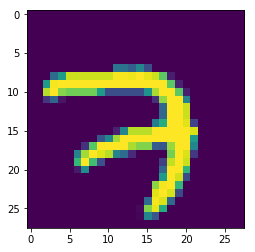

In [21]:
% pylab inline
import matplotlib.pyplot as plt
plt.imshow(sample_image)

In [22]:
mnist.train.labels[0]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.])

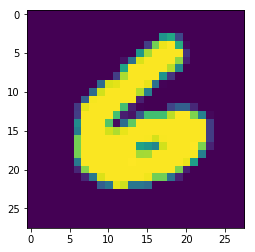

In [23]:
sample_image = mnist.train.images[18].reshape((28,28))
plt.imshow(sample_image)

In [24]:
mnist.train.labels[18]

array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.])

### 設定網路參數

In [25]:
learning_rate   = 0.001
training_epochs = 15
batch_size      = 100

In [26]:
n_hidden_1 = 256 
n_hidden_2 = 256 
n_input    = 784 
n_classes  = 10 
n_samples  = mnist.train.num_examples

### Placeholder

In [27]:
x = tf.placeholder("float", [None, n_input])
y = tf.placeholder("float", [None, n_classes])

### 建構神經網路

In [28]:
def multilayer_perceptron(x, weights, biases):  
    # First Hidden layer with RELU activation
    layer_1 = tf.add(tf.matmul(x, weights['h1']), biases['b1'])
    layer_1 = tf.nn.relu(layer_1)
    
    # Second Hidden layer with RELU activation
    layer_2 = tf.add(tf.matmul(layer_1, weights['h2']), biases['b2'])
    layer_2 = tf.nn.relu(layer_2)
    
    # Last Output layer
    out_layer = tf.matmul(layer_2, weights['out']) + biases['out']
    return out_layer

### 設定權重變數

In [31]:
weights = {
    'h1': tf.Variable(tf.random_normal([n_input, n_hidden_1])),
    'h2': tf.Variable(tf.random_normal([n_hidden_1, n_hidden_2])),
    'out': tf.Variable(tf.random_normal([n_hidden_2, n_classes]))
}

In [32]:
biases = {
    'b1': tf.Variable(tf.random_normal([n_hidden_1])),
    'b2': tf.Variable(tf.random_normal([n_hidden_2])),
    'out': tf.Variable(tf.random_normal([n_classes]))
}

### 設定 cost 與 optimizer

In [34]:
pred = multilayer_perceptron(x, weights, biases)

In [35]:
cost      = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=pred, labels=y))
optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate).minimize(cost)

### 初始化變數

In [36]:
init = tf.global_variables_initializer()

### 訓練模型 

In [43]:
# Start the session
sess = tf.InteractiveSession()

# Intialize all the variables
sess.run(init)

for epoch in range(training_epochs):

    # Initial the cost = 0.0
    avg_cost = 0.0

    total_batch = int(n_samples/batch_size)

    for i in range(total_batch):

        batch_x, batch_y = mnist.train.next_batch(batch_size)
        _, c = sess.run([optimizer, cost], feed_dict={x: batch_x, y: batch_y})

        # Compute average loss
        avg_cost += c / total_batch

    print("Epoch: {} cost={}".format(epoch+1,avg_cost))

print("Training Completed in {} Epochs".format(training_epochs))

Epoch: 1 cost=164.15418444546776
Epoch: 2 cost=61.81171880201861
Epoch: 3 cost=45.483870370171324
Epoch: 4 cost=36.46853502013467
Epoch: 5 cost=30.73705754973672
Epoch: 6 cost=26.606686183322562
Epoch: 7 cost=23.550947105234318
Epoch: 8 cost=21.185782755071475
Epoch: 9 cost=19.2246683300625
Epoch: 10 cost=17.595534928278475
Epoch: 11 cost=16.226387270363894
Epoch: 12 cost=14.999023752537637
Epoch: 13 cost=13.978483177098363
Epoch: 14 cost=13.066234773072322
Epoch: 15 cost=12.24721363847906
Training Completed in 15 Epochs


### 評估模型

In [44]:
pred

<tf.Tensor 'add_3:0' shape=(?, 10) dtype=float32>

In [45]:
correct_predictions = tf.equal(tf.argmax(pred, 1), tf.argmax(y, 1))

In [46]:
correct_predictions = tf.cast(correct_predictions, "float")

In [47]:
accuracy = tf.reduce_mean(correct_predictions)

In [48]:
print("Accuracy:", accuracy.eval({x: mnist.test.images, y: mnist.test.labels}))

Accuracy: 0.9104
